# Basic Image Processing In python

In [52]:
import numpy as np
import os # 현재 폴더를 가져오는 역할
# scipy 1.2.0 이휴부터는 imread는 삭제되었다. imageio.imread를 사용해야한다
# scipy의 imresize는 skimage.transform.resize로 대체되었다
from imageio import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [53]:
# Version Check
import matplotlib
import imageio
import skimage


print("numpy version : " + np.__version__)
print("imageio version : " + imageio.__version__)
print("skimgae version : " + skimage.__version__)
print("matplotlib version : " + matplotlib.__version__)

numpy version : 1.21.5
imageio version : 2.19.3
skimgae version : 0.19.2
matplotlib version : 3.2.2


## 1. Print Current Folder

In [54]:
cwd = os.getcwd()
print("Current folder is %s" % (cwd))

Current folder is c:\Users\somad\Desktop\Study\Machine Learning\pulse of dl


## 2. Print Function

In [55]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape, )) #tuple은 출력할 때 ','를 붙여주어야 한다.

## 3. Load An image

In [56]:
cat = imread("./data/cat.jpg")
print_typeshape(cat)


Type is <class 'imageio.core.util.Array'>
Shape is (1600, 2400, 3)


c:\Users\somad\anaconda3\envs\ml_textbook\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


## 4. Plot Loaded image

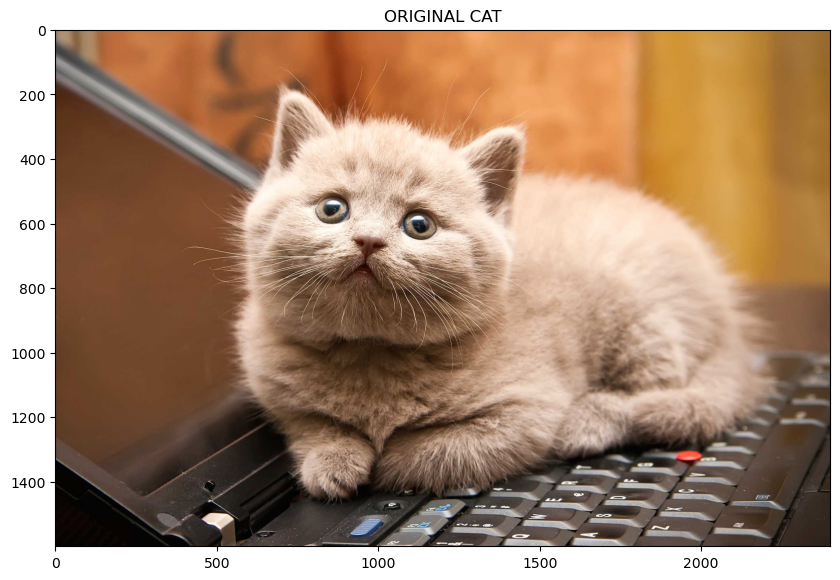

In [57]:
plt.figure(figsize=(10, 8))
plt.imshow(cat)
plt.title("ORIGINAL CAT")
plt.draw()

## 5. Load + Cast to Float?

In [58]:
print(cat)

[[[150 114  92]
  [151 115  93]
  [152 117  95]
  ...
  [148 107  45]
  [148 107  45]
  [148 107  45]]

 [[150 114  92]
  [151 115  93]
  [152 117  95]
  ...
  [148 107  45]
  [148 107  45]
  [148 107  45]]

 [[150 114  92]
  [151 115  93]
  [152 117  95]
  ...
  [148 107  45]
  [148 107  45]
  [148 107  45]]

 ...

 [[  7   3   0]
  [  7   3   0]
  [  7   3   0]
  ...
  [ 42  35  25]
  [ 42  35  25]
  [ 42  35  25]]

 [[  7   3   0]
  [  7   3   0]
  [  7   3   0]
  ...
  [ 42  35  25]
  [ 42  35  25]
  [ 42  35  25]]

 [[  7   3   0]
  [  7   3   0]
  [  7   3   0]
  ...
  [ 42  35  25]
  [ 42  35  25]
  [ 42  35  25]]]


In [59]:
# LOAD
cat2 = imread("./data/cat.jpg").astype(float) # numpy의 float는 built in float로 deprecated되었다. 
# https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
print_typeshape(cat2)


Type is <class 'imageio.core.util.Array'>
Shape is (1600, 2400, 3)


c:\Users\somad\anaconda3\envs\ml_textbook\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


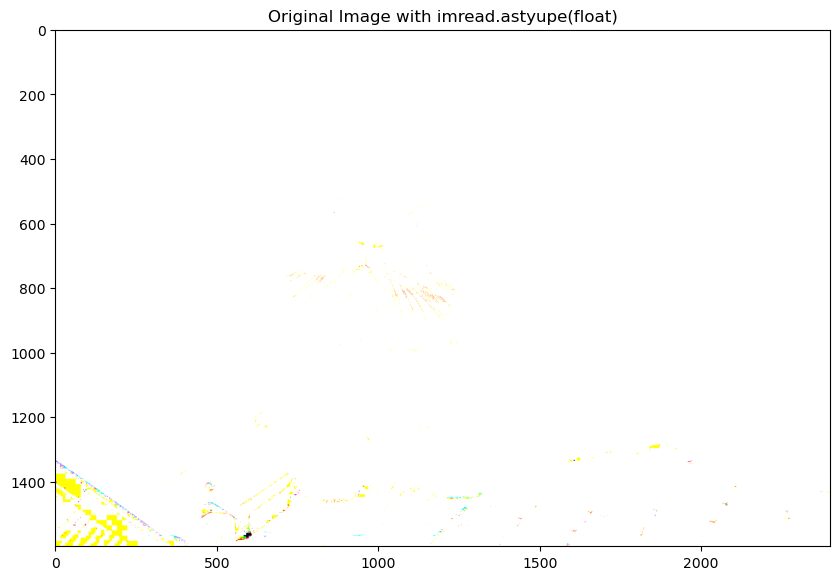

In [60]:
# PLOT
plt.figure(figsize=(10, 8))
plt.imshow(cat2) # 정수타입이면 값이 0~255, 부동소수점은 0~1일 것이라고 가정하여 결과가 이상하게 나오는 것이다.
plt.title("Original Image with imread.astyupe(float)")
plt.draw()

## 6. Load + Cast to float + normalize to 0 ~ 1

c:\Users\somad\anaconda3\envs\ml_textbook\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """Entry point for launching an IPython kernel.


Type is <class 'imageio.core.util.Array'>
Shape is (1600, 2400, 3)


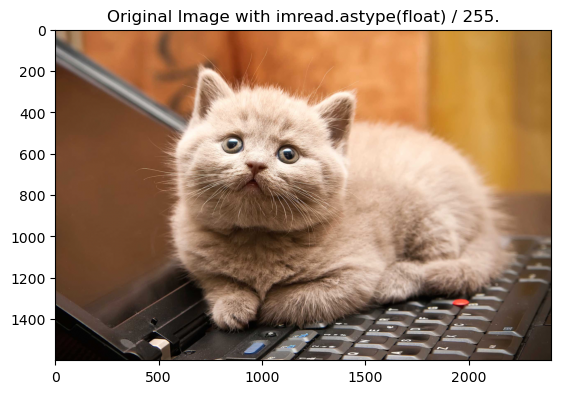

In [61]:
cat3 = imread("./data/cat.jpg").astype(float) / 255.
print_typeshape(cat3)

plt.figure(0)
plt.imshow(cat3)
plt.title("Original Image with imread.astype(float) / 255.")
plt.draw()

## 7. Resize
resize는 주어진 이미지의 사이즈를 조정하는 것이다.

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


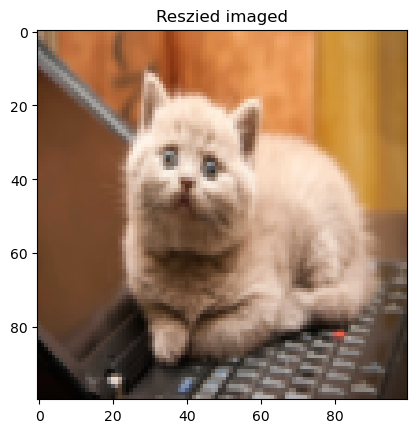

In [62]:
# Resize
catsmall = resize(cat, [100, 100])
print_typeshape(catsmall)

# Plot
plt.figure(1)
plt.imshow(catsmall)
plt.title("Reszied imaged")
plt.draw()

## 8. Grayscale

In [63]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]) # TODO : 설명링크 첨부예정
    else:
        print("Current Image if GRAY!")
        return rgb

In [64]:
catsmallgray = rgb2gray(catsmall)
print("size of catsmallgray is %s" % (catsmallgray.shape, )) # tuple을 %s로 출력하려면 뒤에 ','를 붙여주어야 한다. # shape가 (100, 100)이 된 것을 확인할 수 있다.
print("type of catsmallgray is", type(catsmallgray))

size of catsmallgray is (100, 100)
type of catsmallgray is <class 'numpy.ndarray'>


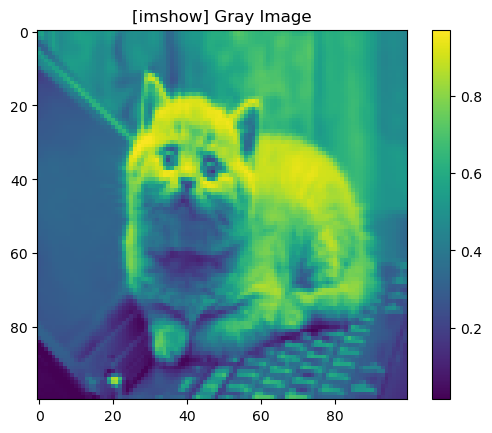

In [65]:
# cmap이라는 color map이 없으면 결과가 이상하다.
# 행렬을 그리는 것이기 때문에 행렬의 값이 RGB던 뭐던 중요하지 않다.
# colormape이라는 것을 통해서 각각의 값을 다른 색깔로 표현해주어야 한다.
plt.imshow(catsmallgray) 
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

# plt.imshow(catsmallgray, cmap=plt.get_cmap("gray"))
# plt.title("[imshow] Gray Image")
# plt.colorbar()
# plt.draw()

## 9. Reshpae

모양을 바꾸는 것이다. 모양을 바꿀 때 그 안에 있는 element의 개수는 변함없다.

In [66]:
# MATRIX TO VECTOR
# (1, -1) 한 줄로 피되, 옆에 있는 것은 알아서 펴라. 100x100이 있으면 1 x 10000이 된다.
# (1, 10000)이라고 해도 되지만, 그러면 귀찮잖아.
catrowvec = np.reshape(catsmallgray, (1, -1)) 
print("size of catrowvec is %s" % (catrowvec.shape,))
print("type of catrowvec is", type(catrowvec))

size of catrowvec is (1, 10000)
type of catrowvec is <class 'numpy.ndarray'>


In [67]:
# VECTOR TO MATRIX
catmatrix = np.reshape(catrowvec, (100, -1))
print("size of catrowvec is %s" % (catmatrix.shape,))
print("type of catrowvec is", type(catmatrix))

size of catrowvec is (100, 100)
type of catrowvec is <class 'numpy.ndarray'>


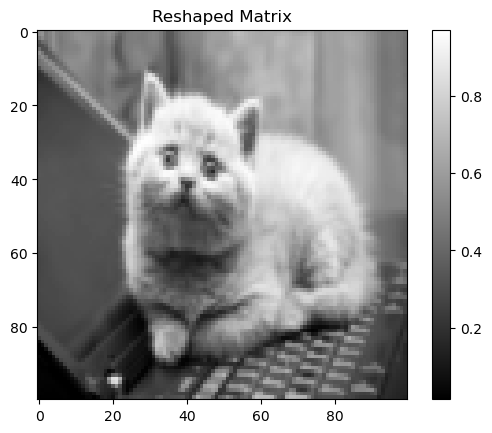

In [68]:
plt.imshow(catmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

## 10. Load from folder

### First, See what's inside the folder

In [69]:
cwd = os.getcwd()
path = cwd + "\\data\\"
flist = os.listdir(path)
print("[%d] File are in [%s]" % (len(flist), path))

[1] File are in [c:\Users\somad\Desktop\Study\Machine Learning\pulse of dl\data\]


In [70]:
flist

['cat.jpg']

### List up Files inside the folder

In [71]:
for i, f in enumerate(flist):
    print("[%d]The file is [%s]" % (i, f))

[0]The file is [cat.jpg]


### Load images with appropriate extensions

In [72]:
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg"]
imgs = []
names = []

for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue

    # Load and append to imgs list
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))

    # Append names
    names.append(os.path.splitext(f)[0])

c:\Users\somad\anaconda3\envs\ml_textbook\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  if sys.path[0] == "":


In [73]:
names

['cat']

### Plot loaded images

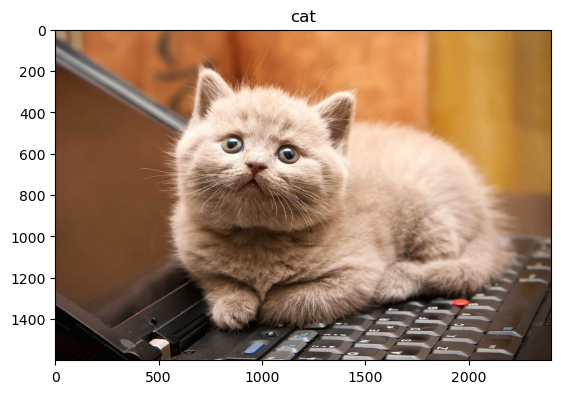

In [74]:
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()